Adınız: Zeynep

Soyadınız: Söylemez

Okul Numarası: 2212721031

GitHub Repo Bağlantısı: https://github.com/zeynep-35/Mlp_Fask

Veri Setinin İlk 5 Satırı:


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06



Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None

Kayıp Veri Sayıları:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


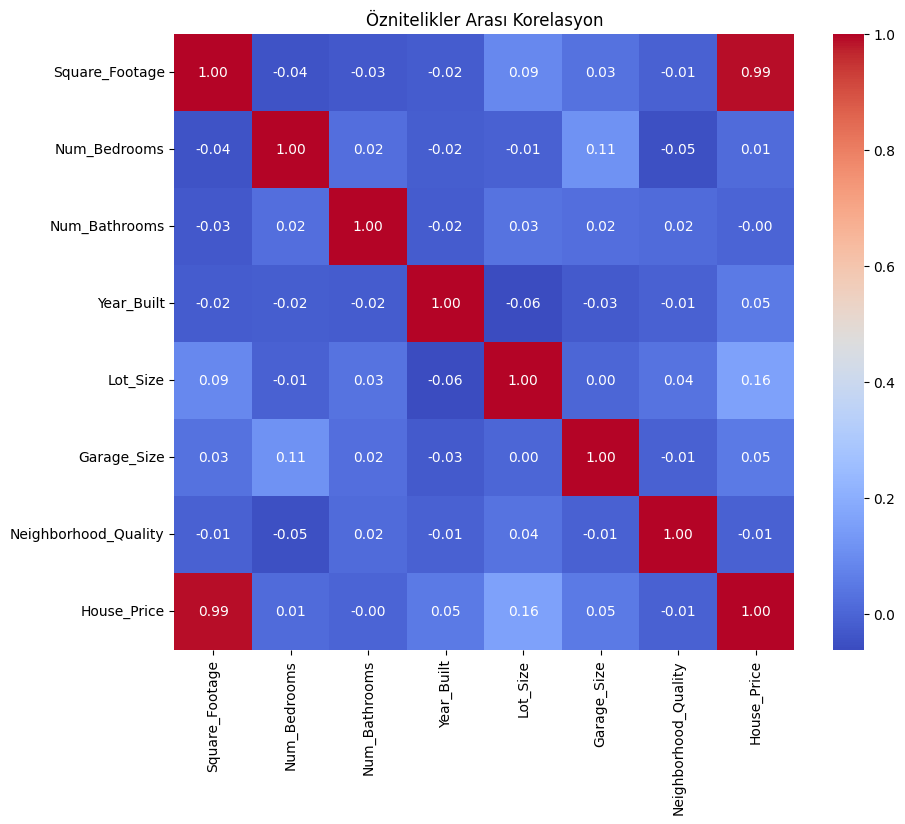

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle


df = pd.read_csv('house_price_regression_dataset.csv')

# İlk 5 satırı göster
print("Veri Setinin İlk 5 Satırı:")
display(df.head())

# Veri Hakkında Bilgi
print("\nVeri Seti Bilgileri:")
print(df.info())

# Kayıp Veri Kontrolü
print("\nKayıp Veri Sayıları:")
print(df.isnull().sum())

# Korelasyon Matrisi (Hangi özellik fiyatla ne kadar ilişkili?)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Öznitelikler Arası Korelasyon")
plt.show()

In [ ]:
# Bağımlı (y) ve Bağımsız (X) değişkenleri ayır
y = df['House_Price']  # Hedefimiz: Ev Fiyatı
X = df.drop(['House_Price'], axis=1) # Diğer tüm sütunlar öznitelik

# Backward Elimination Döngüsü
# P-value değeri 0.05'ten büyük olan en kötü özelliği her adımda eleyeceğiz.
cols = list(X.columns)
pmax = 1
while (len(cols) > 0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1) # Sabit katsayı ekle (b0)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()

    if(pmax > 0.05):
        print(f"Elenen Öznitelik: {feature_with_p_max} (P-value: {pmax:.4f})")
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print("\nSeçilen En İyi Öznitelikler:", selected_features)

# Veriyi seçilen özniteliklerle güncelle
X = X[selected_features]

Elenen Öznitelik: Neighborhood_Quality (P-value: 0.4540)

Seçilen En İyi Öznitelikler: ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size']


In [ ]:
# Veriyi Eğitim (%80) ve Test (%20) olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli Kur
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Tahmin Yap
y_pred = regressor.predict(X_test)

# Başarı Metrikleri
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score (Başarı Oranı): {r2:.4f}")
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"MSE (Ortalama Kare Hata): {mse:.2f}")

R2 Score (Başarı Oranı): 0.9984
MAE (Ortalama Mutlak Hata): 8164.60
MSE (Ortalama Kare Hata): 101211537.28


In [ ]:
# Modeli kaydet
pickle.dump(regressor, open('model.pkl', 'wb'))
print("Model başarıyla 'model.pkl' olarak kaydedildi.")

Model başarıyla 'model.pkl' olarak kaydedildi.
